<a href="https://colab.research.google.com/github/Bereket2017issack/Income_Prediction/blob/master/income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datascience import *
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt

from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

Lets import and display our dataset


In [87]:
Table = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data")
Table.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [88]:
Table.tail()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Now lets assign names to each feaure in our data frame

In [89]:

# Assigning feature names to our Table
columnss = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
Table.columns = columnss
Table.head()

# Note: fnlwgt is final weight of the individuals

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Now lets identify columns with missing values 

In [90]:
Table.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [91]:

col_missing = Table.isnull().sum(axis = 0)
col_missing

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

All columns have zero missing values which means there are no missing values in each column

Lets identify the unknown values in each feature

In [0]:
# Developing a function that identifies unknowns values in each feature (column)

def missing_values(table, x):
  table2 = table.groupby([x]).agg({x : "count"})
  return table2#.iloc[:1]

In [93]:
missing_values(Table, "age").head()

,age
age,
17,395
18,550
19,712
20,753
21,720


According to our result age has no missing values at all

In [94]:
missing_values(Table, "workclass")

,workclass
workclass,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1297
Without-pay,14


1. According to our function result, workclass has 1836 counts which have a unique character (?), but no missing values
2. Most of the adults work in private other than the unknowns
3. Only 7 adults have never worked before and interesting 14 individuals work with our payment


In [95]:
missing_values(Table, "fnlwgt").head()

,fnlwgt
fnlwgt,
12285,1
13769,1
14878,1
18827,1
19214,1


In [96]:
missing_values(Table, "education").head()

,education
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333


1. In education feature we have no either missing values or unknow values
2. Majority of the adults have HS-grad
3. And very few of them had only be in Preschool

In [97]:
missing_values(Table, "education-num").head()

,education-num
education-num,
1,51
2,168
3,333
4,646
5,514


1. There are no missing values as well as unknown values in this feature
2. Most of the adults have reached till 9th grade but a very of them have only attended grade 1
3. Significant amounts of the individuals have a four year degree 

In [98]:

missing_values(Table, "occupation").head()

,occupation
occupation,
?,1843
Adm-clerical,3769
Armed-Forces,9
Craft-repair,4099
Exec-managerial,4066


1. In occupation feature we have 1843 unknown values but no missing values
2. Many of the adults have higher levels of occupation such as Prof-speciality, Exec-managerial and Craft-repair
3. Only 9 out of all the individuals are part of the armed force which is really insignificant

In [99]:
missing_values(Table, "marital-status").head()

,marital-status
marital-status,
Divorced,4443
Married-AF-spouse,23
Married-civ-spouse,14976
Married-spouse-absent,418
Never-married,10682


1. Marital-status has neither missing values nor unknowns
2. Most of the adults are Married-civ-spouse 
3. Only 23 individuals are Married-AF-spouse
4. significant amount of the adults have Never-married

In [100]:
missing_values(Table, "relationship").head()

,relationship
relationship,
Husband,13193
Not-in-family,8304
Other-relative,981
Own-child,5068
Unmarried,3446


1. In the feature relationship we have no missing values or unknown values
2. More than thirteen thousands of the individuals are husbands and comparing with only 1568 wives there is high disparity amoung the individuals


In [101]:
missing_values(Table, "race")

,race
race,
Amer-Indian-Eskimo,311
Asian-Pac-Islander,1039
Black,3124
Other,271
White,27815


1. There are no missing values as well as unknown values
2. About twenty nine thousands of the adults are white and around three thounds of the individuals are blacks. Other races are even lower than blacks

In [102]:
missing_values(Table, "sex")

,sex
sex,
Female,10771
Male,21789


1. We don't have missing values as well as unknown values
2. Here in sex variable male adults are much more than females


In [103]:
missing_values(Table, "capital-gain").head()

,capital-gain
capital-gain,
0,29849
114,6
401,2
594,34
914,8


In [104]:
missing_values(Table, "capital-loss").head()

,capital-loss
capital-loss,
0,31041
155,1
213,4
323,3
419,3


In [105]:
missing_values(Table, "hours-per-week").head()

,hours-per-week
hours-per-week,
1,20
2,32
3,39
4,54
5,60


In [106]:
missing_values(Table, "native-country").head()

,native-country
native-country,
?,583
Cambodia,19
Canada,121
China,75
Columbia,59


1. In this feature we have 583 unknow values, but we don't have missing values
2. Majority of the individuals are from United-States and only one individual is from Netherlands
3. We dont have African native American and Europe has the highest number of people by nativity

In [107]:
missing_values(Table, "income")

,income
income,
<=50K,24719
>50K,7841


1. Income of the individuals which is going to be the dependent variable has no missing values or unknow for that matter
2. More than two third of the adults earn less or equal to 50k per year

## **Our next step is to replace the character "?" with value "Nan"** string
So we develop a function that applies on each feature

In [108]:
# Replacing the "?" to nan
Table=Table.replace('[?]',np.NAN,regex=True)
Table.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [109]:
Table = Table.dropna()
Table.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [110]:
Table.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [111]:
Table.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [112]:
# deleting rows with nan values 
Table= Table.dropna()
Table.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# **Lets now drop features and rows that aren't relevant **

fnlwgt is not relevant to our objective. So it is necessary to drop it from Table

In [113]:
Table1 = Table.drop(columns=["fnlwgt"])
Table1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# **Check if all the nan values and the irrelevant variable are deleted**

In [114]:
missing_values(Table1, "workclass")

,workclass
workclass,
Federal-gov,943
Local-gov,2067
Private,22286
Self-emp-inc,1074
Self-emp-not-inc,2499
State-gov,1278
Without-pay,14


In [115]:
missing_values(Table1, "occupation")

,occupation
occupation,
Adm-clerical,3720
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


In [116]:
missing_values(Table1, "native-country")

,native-country
native-country,
Cambodia,18
Canada,107
China,68
Columbia,56
Cuba,92
Dominican-Republic,67
Ecuador,27
El-Salvador,100
England,86


In [117]:
Table1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# **2. Importing Test Datasets and Cleaning **

In [118]:
test_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test")
test_data.head()

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [119]:
# Assining feature names to our test data 
columnss = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

test_data1 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names = columnss)
test_data1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [120]:
# The first row of test_data has invalid values, so it should be deleted

test_data2 = test_data1.drop(test_data1.index[0])
test_data2.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [121]:
missing_values(test_data2, "age").head()

,age
age,
17,200
18,312
19,341
20,360
21,376


In [122]:
# Replacing the "?" to nan
test_data3 = test_data2.replace('[?]',np.NAN,regex=True)
test_data3.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [123]:
# Finally we have to drop all nan values to clean the data

test_data4 = test_data3.dropna()
test_data4.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.


In [124]:
test_data4.values


array([['25', ' Private', 226802.0, ..., 40.0, ' United-States',
        ' <=50K.'],
       ['38', ' Private', 89814.0, ..., 50.0, ' United-States',
        ' <=50K.'],
       ['28', ' Local-gov', 336951.0, ..., 40.0, ' United-States',
        ' >50K.'],
       ...,
       ['38', ' Private', 374983.0, ..., 50.0, ' United-States',
        ' <=50K.'],
       ['44', ' Private', 83891.0, ..., 40.0, ' United-States',
        ' <=50K.'],
       ['35', ' Self-emp-inc', 182148.0, ..., 60.0, ' United-States',
        ' >50K.']], dtype=object)

# The result shows that age is still string and should be converted to numeric

In [125]:
test_data4["age"] = test_data4["age"].astype("int")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [126]:
test_data4.values

array([[25, ' Private', 226802.0, ..., 40.0, ' United-States', ' <=50K.'],
       [38, ' Private', 89814.0, ..., 50.0, ' United-States', ' <=50K.'],
       [28, ' Local-gov', 336951.0, ..., 40.0, ' United-States',
        ' >50K.'],
       ...,
       [38, ' Private', 374983.0, ..., 50.0, ' United-States', ' <=50K.'],
       [44, ' Private', 83891.0, ..., 40.0, ' United-States', ' <=50K.'],
       [35, ' Self-emp-inc', 182148.0, ..., 60.0, ' United-States',
        ' >50K.']], dtype=object)

In [127]:
test_data4.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [128]:
# Lets remove the fnlwgt from our test_data

test_data5 = test_data4.drop(columns = "fnlwgt")
test_data5.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.


Lets join the test data and the train data together 

In [129]:


test_train = pd.concat([Table1, test_data5], join = "outer")
test_train.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [130]:
test_train.reset_index(drop=True, inplace=True)
test_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [131]:
missing_values(test_train, "occupation")

,occupation
occupation,
Adm-clerical,5539
Armed-Forces,14
Craft-repair,6020
Exec-managerial,5984
Farming-fishing,1480
Handlers-cleaners,2046
Machine-op-inspct,2970
Other-service,4808
Priv-house-serv,232


In [132]:
missing_values(test_train, "workclass")

,workclass
workclass,
Federal-gov,1406
Local-gov,3100
Private,33307
Self-emp-inc,1646
Self-emp-not-inc,3796
State-gov,1945
Without-pay,21


In [133]:
missing_values(test_train, "age").head()

,age
age,
17,493
18,695
19,864
20,916
21,935


In [134]:
missing_values(test_train, "native-country").head()

,native-country
native-country,
Cambodia,26
Canada,163
China,113
Columbia,82
Cuba,133


In [135]:
missing_values(test_train, "race")

,race
race,
Amer-Indian-Eskimo,435
Asian-Pac-Islander,1303
Black,4228
Other,353
White,38902


In [136]:
missing_values(test_train, "sex")

,sex
sex,
Female,14695
Male,30526


In [137]:
missing_values(test_train, "income")

,income
income,
<=50K,22653
<=50K.,11360
>50K,7508
>50K.,3700


Removing characters from income values to keep the values in the same format.

In [138]:
test_train.income = test_train.income.str.replace('.', '')
test_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [139]:
test_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [140]:
# Checking if the characters are eliminated from the income values
missing_values(test_train, "education-num").head()

,education-num
education-num,
1.0,72
2.0,222
3.0,449
4.0,823
5.0,676


In [141]:
missing_values(test_train, "age").tail()

,age
age,
86,1
87,1
88,5
89,1
90,46


In [142]:
numerical_features_describe = test_train.describe()
numerical_features_describe

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.547931,10.118396,1101.406625,88.597377,40.938038
std,13.218016,2.552873,7506.511388,404.960355,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [143]:
test_train.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

# **3. The next step is converting all catogorical variables to numerical values**

Here is the principle how the conversion and allocation of numeric values work.

1. If an adult income is <=50k, we assign the numeric value =1 under that income value and 0 under income value >50k
2. If an adult income is >50k, we assign the numeric value = 1 under that income value and 0 under income value <=50k 






In [144]:
test_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.547931,10.118396,1101.406625,88.597377,40.938038
std,13.218016,2.552873,7506.511388,404.960355,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [145]:
#numerical_variables = test_["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
catagorical_variables = test_train[["workclass", "education", "marital-status", "native-country", "occupation", "race", "sex", "relationship"]]
catagorical_variables.head()

,workclass,education,marital-status,native-country,occupation,race,sex,relationship
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,United-States,Exec-managerial,White,Male,Husband
1,Private,HS-grad,Divorced,United-States,Handlers-cleaners,White,Male,Not-in-family
2,Private,11th,Married-civ-spouse,United-States,Handlers-cleaners,Black,Male,Husband
3,Private,Bachelors,Married-civ-spouse,Cuba,Prof-specialty,Black,Female,Wife
4,Private,Masters,Married-civ-spouse,United-States,Exec-managerial,White,Female,Wife


In [146]:
catagorical_variables["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [0]:
education_level = {"education": {"Preschool":0, "1st-4th":1, "5th-6th":2, "7th-8th":3, "9th":4, "10th":5, "11th":6, "12th":7, "Assoc-voc":8, "Assoc-acdm":9,
                                "Some-college":10, "Bachelors":11, "Masters":12, "HS-grad":13, "Doctorate":14, "Prof-school":15}}

In [148]:
catagorical_variables.replace(education_level, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4550: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


# Dropping education from the catagorical variables due to high correlation with education-num (multicillinearity problem)

In [149]:

catagorical_variables = catagorical_variables.drop(["education"], axis = 1)
catagorical_variables.head()

,workclass,marital-status,native-country,occupation,race,sex,relationship
0,Self-emp-not-inc,Married-civ-spouse,United-States,Exec-managerial,White,Male,Husband
1,Private,Divorced,United-States,Handlers-cleaners,White,Male,Not-in-family
2,Private,Married-civ-spouse,United-States,Handlers-cleaners,Black,Male,Husband
3,Private,Married-civ-spouse,Cuba,Prof-specialty,Black,Female,Wife
4,Private,Married-civ-spouse,United-States,Exec-managerial,White,Female,Wife


In [0]:
#catagorical_variables["education"].unique()

In [0]:
#catagorical_variables["education"].head()

In [0]:
#ducation_level = {"education": {"Preschool":0, "1st-4th":1, "5th-6th":2, "7th-8th":3, "9th":4, "10th":5, "11th":6, "12th":7, 

In [153]:
# Income feature 
income_feature = test_train["income"]
income_feature.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [154]:
# get_dummies is one of the popular python functions that helps us convert all catagorical vaues to numeric.
# lets develop one function that can accoplish the job.

#def catagory_num(tbl, col):

#all_catagorical_features = test_train.columns.drop("age", "education-num", "capital-gain", "capital-loss", "hours-per-week")
test_trainn = pd.get_dummies(catagorical_variables)
test_trainn.head()
  



,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,...,race_ Other,race_ White,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1


In [155]:
from sklearn.preprocessing import LabelEncoder
labelencoder_income = LabelEncoder()

income_feature_label = labelencoder_income.fit_transform(income_feature)
income_feature_label

array([0, 0, 0, ..., 0, 0, 1])

In [156]:
income_feature_label.shape

(45221,)

In [157]:
test_trainn.columns

Index(['workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'native-country_ Cambodia',
       'native-country_ Canada', 'native-country_ China',
       'native-country_ Columbia', 'native-country_ Cuba',
       'native-country_ Dominican-Republic', 'native-country_ Ecuador',
       'native-country_ El-Salvador', 'native-country_ England',
       'native-country_ France', 'native-country_ Germany',
       'native-country_ Greece', 'native-country_ Guatemala',
       'native-country_ Haiti', 'native-country_ Holand-Netherlands',
       'native-country_ Honduras', 'native-country_ Hong'

In [158]:
numerical_features = test_train[['age',	'education-num',	'capital-gain',	'capital-loss',	'hours-per-week']]
numerical_features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,50,13.0,0.0,0.0,13.0
1,38,9.0,0.0,0.0,40.0
2,53,7.0,0.0,0.0,40.0
3,28,13.0,0.0,0.0,40.0
4,37,14.0,0.0,0.0,40.0


In [159]:
edu_dataframe = numerical_features['education-num']
edu_dataframe.head()

0    13.0
1     9.0
2     7.0
3    13.0
4    14.0
Name: education-num, dtype: float64

In [160]:
numerical_features.shape

(45221, 5)

In [161]:
income_dataframe = pd.DataFrame({"Income_val": income_feature_label})
income_dataframe.head()

,Income_val
0,0
1,0
2,0
3,0
4,0


In [162]:
edu_income = pd.concat([income_dataframe, edu_dataframe], axis=1)
edu_income.head()

,Income_val,education-num
0,0,13.0
1,0,9.0
2,0,7.0
3,0,13.0
4,0,14.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


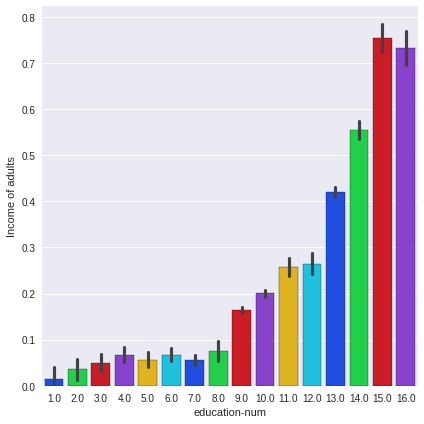

In [163]:
edu_inc = snb.factorplot(x="education-num",y="Income_val",data=edu_income,kind="bar",size = 6, palette = "bright")
edu_inc.despine(right=True)
edu_inc = edu_inc.set_ylabels("Income of adults")
#edu_inc = g.set_ylabels("Income of adults")


In [164]:
age_dataframe = numerical_features.age
age_dataframe.head()

0    50
1    38
2    53
3    28
4    37
Name: age, dtype: int64

In [165]:
age_income = pd.concat([income_dataframe, age_dataframe], axis=1)
age_income.head()

,Income_val,age
0,0,50
1,0,38
2,0,53
3,0,28
4,0,37


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


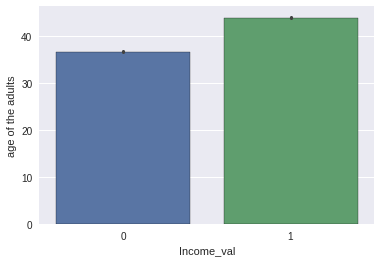

In [166]:
# age and income can be also compated
g = snb.barplot(x="Income_val",y="age",data=age_income)
g = g.set_ylabel("age of the adults")
snb.plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


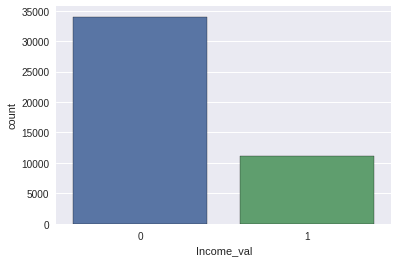

In [167]:
# Here we can count adults who can gets >50k and <=50k

snb.countplot(income_dataframe['Income_val'],label="Count")
snb.plt.show()

In [168]:
income_dataframe

,Income_val
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,1
9,1


In [169]:
num_income_together = pd.concat([numerical_features, income_dataframe], axis=1)
num_income_together.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Income_val
0,50,13.0,0.0,0.0,13.0,0
1,38,9.0,0.0,0.0,40.0,0
2,53,7.0,0.0,0.0,40.0,0
3,28,13.0,0.0,0.0,40.0,0
4,37,14.0,0.0,0.0,40.0,0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


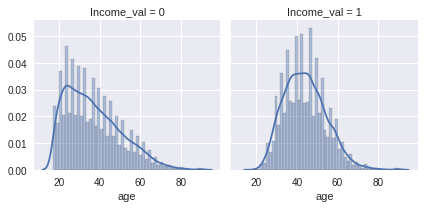

In [170]:
# Here we can compare Income of individuals with their age
age_against_income = snb.FacetGrid(num_income_together, col='Income_val')
age_against_income = age_against_income.map(snb.distplot, "age")
snb.plt.show()

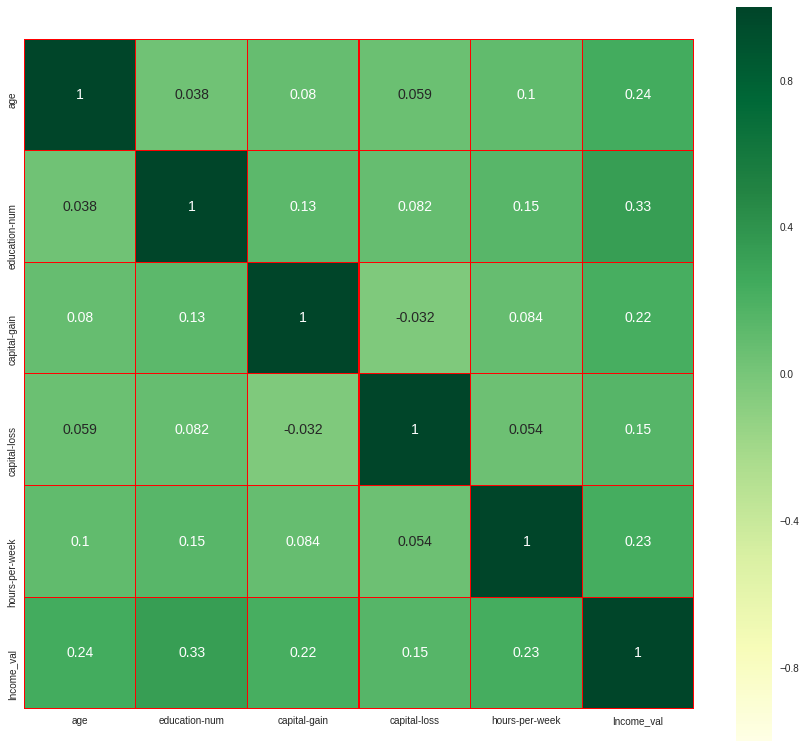

In [171]:
#import seaborn as snb

corr= num_income_together.corr()
fig, ax =plt.subplots(figsize=(15, 15))
colormap=snb.diverging_palette(220, 20, as_cmap=True)
fig=snb.heatmap(num_income_together.corr(), cmap = "YlGn", square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='red',annot_kws={'fontsize':14 })



1. Our hitpmap graph indicates that income has positive correclation with all the numberical features.

2. The hipmap correlation between each numerical variables shows most of the variables have positive correlation. However the correlation is not strong as predicted in our assumption.

3. However "capital-gain" and "capital-loss" both have negative correlation.

In [172]:
min_max_scaler = preprocessing.MinMaxScaler()
numerical_features_normalized = min_max_scaler.fit_transform(numerical_features)

data_normalized = pd.DataFrame(numerical_features_normalized)
#numerical_features_normalized
data_normalized.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4
0,0.452055,0.800000,0.0,0.0,0.122449
1,0.287671,0.533333,0.0,0.0,0.397959
2,0.493151,0.400000,0.0,0.0,0.397959
3,0.150685,0.800000,0.0,0.0,0.397959
4,0.273973,0.866667,0.0,0.0,0.397959


In [173]:
# Normaized numerica features of the data
column2 = ['age',	'education-num',	'capital-gain',	'capital-loss',	'hours-per-week']
data_normalized.columns = column2
data_normalized.head()


,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.452055,0.800000,0.0,0.0,0.122449
1,0.287671,0.533333,0.0,0.0,0.397959
2,0.493151,0.400000,0.0,0.0,0.397959
3,0.150685,0.800000,0.0,0.0,0.397959
4,0.273973,0.866667,0.0,0.0,0.397959


In [174]:
data_normalized.shape

(45221, 5)

In [175]:
test_trainn.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,...,race_ Other,race_ White,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1


In [176]:
test_trainn.shape

(45221, 82)

In [177]:
# Now lets concatinate all the normalized and the numerically converted features together to prepare to build the model

data_test_train = data_normalized.join(test_trainn)
data_test_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Other,race_ White,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.452055,0.800000,0.0,0.0,0.122449,0,0,0,0,1,...,0,1,0,1,1,0,0,0,0,0
1,0.287671,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
2,0.493151,0.400000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.150685,0.800000,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.273973,0.866667,0.0,0.0,0.397959,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1


# Now we have converted our catagorical variables to numerical values, the next step is to avoid "dummy variable trap". 

In [213]:
# We can avoid the dummy variable trap by dropping one column from each catagorical variables

data_test_train.drop(columns=["workclass_ Federal-gov", "marital-status_ Divorced", "native-country_ Canada", "occupation_ Adm-clerical", "race_ Amer-Indian-Eskimo", "relationship_ Husband"])

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.452055,0.800000,0.000000,0.000000,0.122449,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0.287671,0.533333,0.000000,0.000000,0.397959,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,0
2,0.493151,0.400000,0.000000,0.000000,0.397959,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.150685,0.800000,0.000000,0.000000,0.397959,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0.273973,0.866667,0.000000,0.000000,0.397959,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5,0.438356,0.266667,0.000000,0.000000,0.153061,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
6,0.479452,0.533333,0.000000,0.000000,0.448980,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7,0.191781,0.866667,0.140841,0.000000,0.500000,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
8,0.342466,0.800000,0.051781,0.000000,0.397959,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,0.273973,0.600000,0.000000,0.000000,0.806122,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [214]:
!pip install sklearn

## **4. In this step we will split the data into train and test datasets**

In [0]:
# importing the the sklearn library and the splitter function

from sklearn.model_selection import train_test_split



In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_test_train, income_feature_label, test_size = 0.2, random_state = 0)

In [222]:
X_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Other,race_ White,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
13181,0.315068,0.600000,0.0,0.0,0.397959,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
10342,0.452055,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
20881,0.479452,0.400000,0.0,0.0,0.397959,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
24972,0.219178,0.533333,0.0,0.0,0.397959,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
43866,0.246575,0.600000,0.0,0.0,0.500000,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0


In [223]:
X_test.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Other,race_ White,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
41386,0.082192,0.733333,0.0,0.0,0.448980,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
35278,0.315068,0.600000,0.0,0.0,0.316327,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
26950,0.383562,0.800000,0.0,0.0,0.448980,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
29133,0.082192,0.600000,0.0,0.0,0.193878,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
41793,0.191781,0.533333,0.0,0.0,0.397959,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0


In [224]:
y_train.shape

(36176,)

In [225]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [226]:
y_income = pd.DataFrame({"Income": y_train})
y_income.head()

,Income
0,0
1,0
2,0
3,0
4,0


In [227]:
missing_values(y_income, "Income")

,Income
Income,
0,27167
1,9009


In [228]:
y_train.shape

(36176,)

In [229]:
X_train.shape

(36176, 87)

1. According to our result we have 36176 train sets
2. And we have 9045 test sets

In [230]:
y_test

array([0, 0, 0, ..., 1, 1, 0])

In [231]:
pd.DataFrame({"Income": y_test}).head()

,Income
0,0
1,0
2,0
3,0
4,0


# 6. Lets create the first model using SVR

In [232]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [233]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [234]:
y_pred_t = pd.DataFrame({'salary':y_pred})
y_pred_t.head()

,salary
0,0
1,0
2,0
3,0
4,0


In [235]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6377,  469],
       [ 858, 1341]])

In [236]:
# The percentage of SVC result 
(7707/9045)*100 

85.2072968490879

In [237]:
X_train.astype(float).head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Other,race_ White,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
13181,0.315068,0.600000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10342,0.452055,0.533333,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20881,0.479452,0.400000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
24972,0.219178,0.533333,0.0,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43866,0.246575,0.600000,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# Our SVM model has 85.2% confusion **matrix**

In [238]:
X_train.astype(float).head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,race_ Other,race_ White,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
13181,0.315068,0.600000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10342,0.452055,0.533333,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20881,0.479452,0.400000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
24972,0.219178,0.533333,0.0,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
43866,0.246575,0.600000,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# Creating the model using KNN

In [239]:
from sklearn.neighbors import KNeighborsClassifier
K_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p= 2)
K_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [240]:
y_preds = K_classifier.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 1, 0])

In [241]:
# Lets check the how much are correct in our prediction

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_preds)
CM

array([[6221,  625],
       [ 910, 1289]])

In [242]:
# Lest change CM result to proportions
 
((6204 + 1276)/(6204 + 1276 + 923 + 642))*100 

82.69762299613046

# Our KNN model has 82.69% confusion matrix

# Building Naive Bayes Model

In [243]:
from sklearn.naive_bayes import GaussianNB
B_classifier = GaussianNB()

B_classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [244]:
y_predi = B_classifier.predict(X_test)
y_predi

array([1, 0, 1, ..., 1, 1, 1])

In [245]:
from sklearn.metrics import confusion_matrix
b_CM = confusion_matrix(y_test, y_predi)
b_CM

array([[3221, 3625],
       [ 130, 2069]])

In [246]:
# Lets conver the metrics to proportions

((3400 + 2039)/(3400 + 2039 + 160 + 3446))*100 

60.13266998341626

# Our naive_bayes model shows 60.13% confusion matrics

# Lets build Model using RandomForest

In [247]:
from sklearn.ensemble import RandomForestClassifier
r_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

r_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [248]:
y_predicts = r_classifier.predict(X_test)
y_predicts

array([0, 0, 0, ..., 0, 1, 0])

In [249]:
from sklearn.metrics import confusion_matrix
r_CM = confusion_matrix(y_test, y_predicts)
r_CM

array([[6299,  547],
       [ 825, 1374]])

In [250]:
# Lets change the confusion matrix to proportions to see clearn hom many percent of our results are correct

((6264 + 1354)/(6264 + 1354 + 845 + 1354))*100 

77.60008149129062

# Our RandomForest model shows 77.60% confusion matrics